Данные и запросы взяты из курса [АНАЛИТИК ДАННЫХ](https://karpov.courses/analytics) от Анатолия Карпова

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (те, кто разместил эти объявления).

`ads_data.csv` – данные взаимодействий с рекламными объявлениями
* date – дата
* time – время
* event – действие (просмотр/клик)
* platform – платформа
* ad_id – id объявления
* client_union_id – id рекламного кабинета
* campaign_union_id – id рекламной кампании
* ad_cost_type – тип оплаты
* ad_cost – цена
* has_video – есть ли видео
* target_audience_count – размер аудитории

`ads_clients_data.csv` – характеристики рекламных клиентов
* date – дата
* client_union_id – id рекламного кабинета
* community_id – id сообщества
* create_date – дата создания рекламного клиента

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [20]:
# Настройки для графиков
sns.set(style='whitegrid',
        font_scale=1.2,
        rc={'figure.figsize': (14, 6)})

In [21]:
# Функция для подписи графика
def sets_for_plot(plot, title='', title_fontsize=22, 
                  xlabel='', xlabel_fontsize=18, 
                  ylabel='', ylabel_fontsize=18):
    
    plot.set_title(title, fontsize=title_fontsize)
    plot.set_xlabel(xlabel, fontsize=xlabel_fontsize)
    plot.set_ylabel(ylabel, fontsize=ylabel_fontsize)

# Импорт данных

In [52]:
ads_df = pd.read_csv('ads_data.csv', parse_dates=['date', 'time'])
ads_df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [58]:
ads_df.groupby('platform').agg({'event': 'count'})

,event
platform,
android,500356
ios,299979
web,199665


In [23]:
client_df = pd.read_csv('ads_clients_data.csv', parse_dates=['date', 'create_date'])
client_df

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


# Основные рекламные метрики

In [24]:
ads_df.ad_cost_type.unique()

array(['CPM', 'CPC'], dtype=object)

### Доход CPC и CPM

У нас имеется два вида оплаты рекламы: 

**CPC (Cost Per Click)** - стоимость одного клика (ad_cost соответственно стоимость клика)

**CPM (Cost per mille)** - стоимость 1000 показов рекламного баннера (ad_cost стоимость 1000 показов)

In [25]:
# Поле доход
ads_df['income_CPM'] = ads_df.query('ad_cost_type == "CPM" & event == "view"').ad_cost / 1000
ads_df['income_CPC'] = ads_df.query('ad_cost_type == "CPC" & event == "click"').ad_cost

In [26]:
ads_df.head(3)

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,income_CPM,income_CPC
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,0.2006,NaN
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,0.1874,NaN
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,NaN,NaN


In [27]:
# Доход по дням
income_by_day = ads_df.groupby('date').agg({'income_CPM': 'sum',
                                            'income_CPC': 'sum'})
income_by_day

,income_CPM,income_CPC
date,,
2019-04-01,3334.6072,3321.1
2019-04-02,7291.3902,5994.4
2019-04-03,9968.0569,4177.9
2019-04-04,51471.5011,3517.3
2019-04-05,86676.9217,9446.2
2019-04-06,12492.5308,854.4


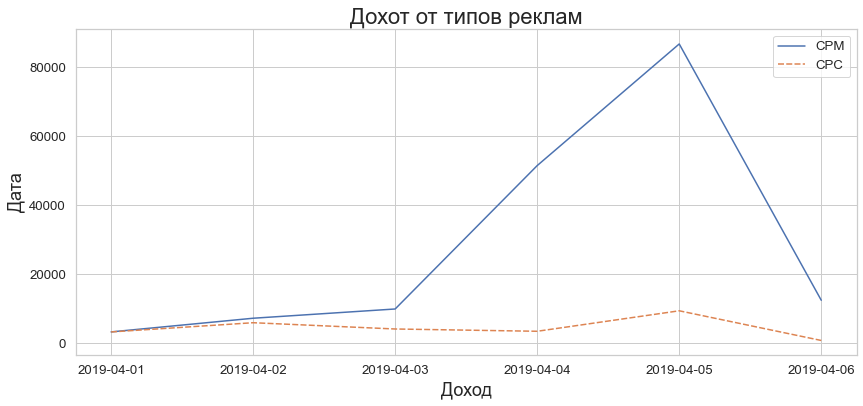

In [28]:
lp = sns.lineplot(data=income_by_day)
sets_for_plot(lp, title='Дохот от типов реклам', xlabel='Доход', ylabel='Дата')
lp.legend(['CPM', 'CPC'])

### CTR  

**CTR (Click-through rate)** – конверсия рекламы, то есть отношение числа кликов к числу показов.

In [29]:
# Создаем группировку по всем рекламам и рассчитаем CTR
amounts_by_events =  ads_df.pivot_table(columns='event', 
                                        index='ad_id',
                                        values='client_union_id',
                                        aggfunc='count',
                                        fill_value=0)
                                
amounts_by_events['ctr'] = amounts_by_events.click / amounts_by_events.view * 100
amounts_by_events

event,click,view,ctr
ad_id,,,
2,1,101,0.990099
3,3,184,1.630435
1902,1,41,2.439024
2064,0,35,0.000000
2132,1,58,1.724138
...,...,...,...
122004,4,100,4.000000
122013,0,156,0.000000
122023,0,68,0.000000


Также есть метрика CR

**CR (Conversion Rate)** - количественное соотношение пользователей сайта, которые совершили целевое действие, к общему числу пользователей.

Например, какая часть пользователей, которые перешли на страницу приложения по рекламе, потом скачали приложение

### Конверсия клиентов, которые пришли в компанию и запустили первую рекламу в течении 365 дней

In [30]:
# Создадим таблицу с информацией о первой рекламе клиента и дате создания клиента
clients_first_ad = ads_df.groupby('client_union_id')\
                        .agg({'date': 'min'}) \
                        .rename(columns={'date': 'date_first_ad'}) \
                        .merge(client_df[['client_union_id','create_date']], left_index=True, 
                               right_on='client_union_id', how='right') \
                        .set_index('client_union_id')
clients_first_ad

,date_first_ad,create_date
client_union_id,,
1,2019-04-01,2018-12-24
2,NaT,2019-02-10
3,NaT,2019-01-25
4,NaT,2018-12-09
5,NaT,2019-01-08
...,...,...
122074,NaT,2018-12-21
122075,NaT,2018-11-09
122076,NaT,2018-10-27


In [31]:
# Порог в 365 дней
treshold = pd.to_timedelta(365, unit='d')
treshold

Timedelta('365 days 00:00:00')

In [32]:
# Определим клиентов с рекламой в течении года
clients_first_ad['ad_during_year'] = clients_first_ad.date_first_ad < (clients_first_ad.create_date + treshold)

In [33]:
# Конверсия 
rate = clients_first_ad.ad_during_year.value_counts(normalize=True)[1] * 100
print('Конверсия клиентов с первуй рекламой в течении 365 дней:', round(rate, 2))

Конверсия клиентов с первуй рекламой в течении 365 дней: 0.69


In [34]:
# Клиенты создавшие рекламу
clients_first_ad[clients_first_ad.date_first_ad.notnull()].ad_during_year.value_counts()

True    838
Name: ad_during_year, dtype: int64

Как видим все клиенты, запустившие хоть одну рекламу сделали это в течении 365 дней. 

Конверсия к общему числу клиентов составляет 0.69%

# Ad-hoc запросы

### Среднее количество показов и среднее количество кликов на объявления за весь период.

In [35]:
print('Среднее число показов: ', amounts_by_events.view.mean().round())
print('Среднее число кликов: ', amounts_by_events.click.mean().round())

Среднее число показов:  923.0
Среднее число кликов:  113.0


### Распределение показов на объявление за весь период.


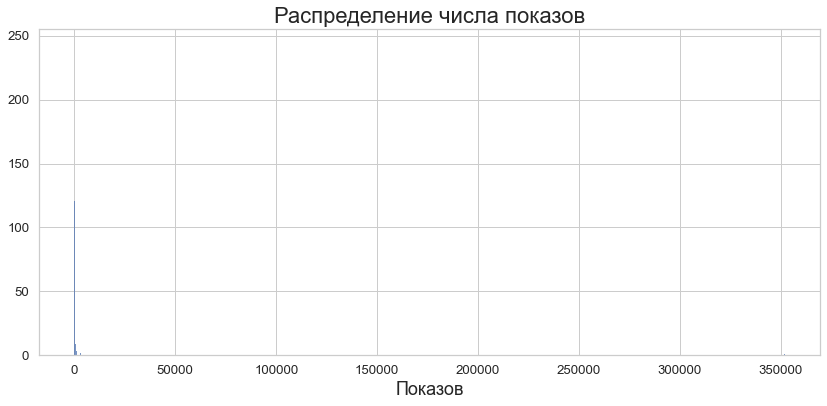

In [36]:
hp = sns.histplot(data=amounts_by_events.view)
sets_for_plot(hp, title='Распределение числа показов', xlabel='Показов')

In [37]:
# Проверка выброса максимального значения
amounts_by_events.view.describe()

count       965.000000
mean        923.131606
std       12945.945595
min           0.000000
25%          35.000000
50%          82.000000
75%         208.000000
max      351802.000000
Name: view, dtype: float64

Распределение абсолютно ненаглядное, т.к. имеются выбросы максимального значения

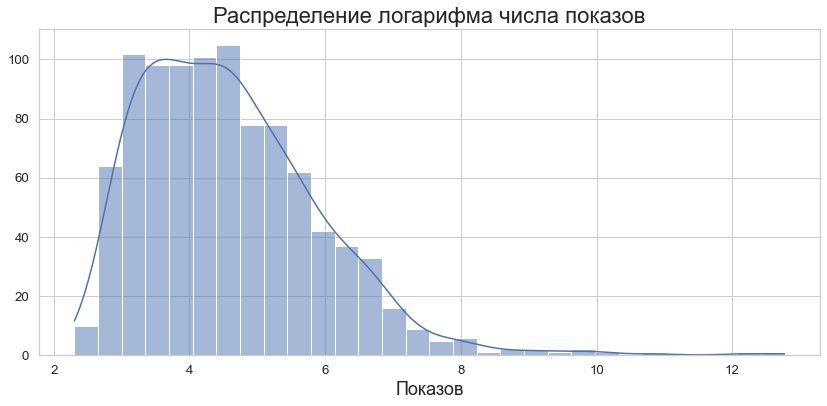

In [38]:
# Логарифмируем данные, чтобы пронаблюдать тенденцию
hp = sns.histplot(data=np.log(amounts_by_events.view), kde=True)
sets_for_plot(hp, title='Распределение логарифма числа показов', xlabel='Показов')

### Среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [39]:
# Для всех клиентов запустивших рекламу найдем разницу в днях
difference_from_first_ad = clients_first_ad[clients_first_ad.date_first_ad.notnull()]
difference_from_first_ad = difference_from_first_ad.date_first_ad - difference_from_first_ad.create_date
difference_from_first_ad

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [40]:
print('Среднее число дней до создания 1 рекламы:', difference_from_first_ad.mean().days)

Среднее число дней до создания 1 рекламы: 124


### Разбить клиентов по промежуткам от создания до запуска рекламного объявления, равными [0, 30, 90, 180, 365] дней


In [41]:
bins=pd.to_timedelta([0, 30, 90, 180, 365], unit='d')


In [42]:
pd.cut(difference_from_first_ad, bins=bins, labels=['0-30', '30-90', '90-180', '180-365']) \
                                    .value_counts() \
                                    .sort_index()

0-30        11
30-90      263
90-180     396
180-365    168
dtype: int64

### Сколько объявлений имеют баг: есть клики, но нет показов
Сколько их?
Для каких платформ это актуально?

In [43]:
# События, у которых нет показов
ad_without_views = amounts_by_events.query('view == 0')
ad_without_views

event,click,view,ctr
ad_id,,,
19223,7,0,inf
26204,6,0,inf
41500,20,0,inf
45418,3,0,inf
115825,4,0,inf
117364,7,0,inf
120431,35,0,inf
120536,6,0,inf
120796,1,0,inf


In [44]:
print('Наблюдений без показов всего:', ad_without_views.shape[0])

Наблюдений без показов всего: 9


In [45]:
# Процент по платформам для багованных объявлений
ads_df[ads_df.ad_id.isin(ad_without_views.index)].platform.value_counts(normalize=True)*100

android    52.808989
ios        33.707865
web        13.483146
Name: platform, dtype: float64

In [46]:
# Процент по платформам для всех объявлений
ads_df.platform.value_counts(normalize=True)*100

android    50.0356
ios        29.9979
web        19.9665
Name: platform, dtype: float64

Объявления с багом наблюдаются н авсех платформах, причем примерно в таком же соотношении, скорее всего баг вызван не выбором платформы

### Есть ли объявления, по которым сначала произошел клик , а потом показ

In [47]:
# Для каждого объявления найдем даты первого показа и первого клика
min_date_for_events = ads_df.pivot_table(index='ad_id',
                                         columns='event',
                                         values='time',
                                         aggfunc='min')
min_date_for_events

event,click,view
ad_id,,
2,2019-04-01 09:23:54,2019-04-01 00:59:41
3,2019-04-01 02:06:11,2019-04-01 00:08:51
1902,2019-04-03 15:20:14,2019-04-03 00:48:39
2064,NaT,2019-04-02 00:52:05
2132,2019-04-04 08:53:24,2019-04-03 02:01:56
...,...,...
122004,2019-04-01 00:31:00,2019-04-01 00:12:11
122013,NaT,2019-04-04 00:04:14
122023,NaT,2019-04-04 00:18:24


In [49]:
# Найдем события, где клик раньше показа
min_date_for_events.query('click < view')

event,click,view
ad_id,,
18681,2019-04-05 00:18:20,2019-04-05 02:45:35
23599,2019-04-05 00:05:26,2019-04-05 05:48:26
32386,2019-04-03 00:03:23,2019-04-03 00:03:25
33033,2019-04-05 00:10:28,2019-04-05 03:33:11
36758,2019-04-04 01:21:18,2019-04-04 01:23:42
38224,2019-04-04 00:02:30,2019-04-04 00:09:24
44283,2019-04-04 00:09:24,2019-04-04 00:11:36
44766,2019-04-05 00:54:49,2019-04-05 02:02:57
46639,2019-04-02 00:01:55,2019-04-02 00:02:06


Мы нашли события, у которых клик наступил раньше просмотра. Необходимо разбираться, что случилось

In [50]:
# Запишем результаты
income_by_day.to_csv('income_by_day.csv')
amounts_by_events.to_csv('amounts_by_events.csv')